In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("numbers.csv")

# Can select individual columns
print("col x:", data['x'], sep='\n')
print("col y:", data['y'], sep='\n')

col x:
0     -0.236722
1     -1.319978
2     -0.429607
3     -0.060468
4      0.136919
         ...   
995    2.005280
996   -0.380592
997    1.973676
998   -1.336272
999   -1.757064
Name: x, Length: 1000, dtype: float64
col y:
0      1.465726
1      0.343028
2     -0.866728
3     -1.069524
4     -1.430797
         ...   
995   -0.334114
996    0.697645
997   -0.419638
998    0.466810
999    0.834072
Name: y, Length: 1000, dtype: float64


In [3]:
# Can get basic stats for columns/dataframes with describe
print("data stats:", data.describe(), sep='\n')

# Can also target certain values (for entire dataframe or a single column)
print(data['x'].min())

data stats:
                 x            y
count  1000.000000  1000.000000
mean      0.018449     0.008542
std       0.966288     1.000814
min      -3.270472    -3.117862
25%      -0.623342    -0.614628
50%      -0.001157     0.014104
75%       0.675053     0.712719
max       3.551777     3.366587
-3.2704724968445817


In [4]:
# It's possible to combine data from multiple dataframes. This example
# creates a new dataframe by doubling each value in the original dataframe.
# Then the original dataframe and this new dataframe are concatenated.
data_2 = data * 2
print("doubled-data:", data_2.describe(), sep='\n')


# Can also concatenate data in multiple dataframes
data_3 = pd.concat([data, data_2])
print("concat data:", data_3.describe(), sep='\n')

doubled-data:
                 x            y
count  1000.000000  1000.000000
mean      0.036899     0.017084
std       1.932576     2.001628
min      -6.540945    -6.235725
25%      -1.246684    -1.229255
50%      -0.002314     0.028208
75%       1.350106     1.425438
max       7.103554     6.733175
concat data:
                 x            y
count  2000.000000  2000.000000
mean      0.027674     0.012813
std       1.527481     1.582036
min      -6.540945    -6.235725
25%      -0.890496    -0.894910
50%      -0.001157     0.018761
75%       0.908622     0.926777
max       7.103554     6.733175


<Figure size 432x288 with 0 Axes>

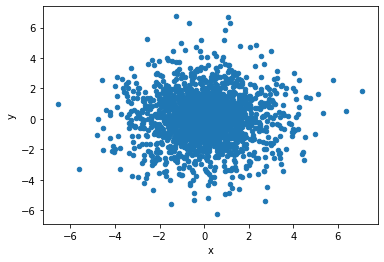

In [5]:
# Dataframes are capable of generating different types of plots.
# Scatter plot example:
plt.figure()
data_3.plot.scatter('x', 'y')

In [6]:
# Pandas can bin data
data_3['x-bin'] = pd.cut(data_3['x'], bins=range(-10, 10, 1))
print("bins for x column:", data_3['x-bin'].value_counts(), sep='\n')

bins for x column:
(-1, 0]      550
(0, 1]       535
(1, 2]       288
(-2, -1]     283
(-3, -2]     109
(2, 3]       107
(3, 4]        46
(-4, -3]      42
(4, 5]        19
(-5, -4]      14
(5, 6]         3
(6, 7]         1
(7, 8]         1
(-6, -5]       1
(-7, -6]       1
(-9, -8]       0
(8, 9]         0
(-8, -7]       0
(-10, -9]      0
Name: x-bin, dtype: int64


In [7]:
# Can also bin datas into buckets evenly
data_3['y-bin'] = pd.qcut(data_3['y'], 10)
print("y-bin:", data_3['y-bin'].head(10), sep='\n')

y-bin:
0      (1.186, 1.893]
1      (0.336, 0.722]
2    (-1.138, -0.662]
3    (-1.138, -0.662]
4    (-1.927, -1.138]
5      (0.336, 0.722]
6      (0.722, 1.186]
7    (-1.138, -0.662]
8     (0.0188, 0.336]
9    (-0.301, 0.0188]
Name: y-bin, dtype: category
Categories (10, interval[float64]): [(-6.237, -1.927] < (-1.927, -1.138] < (-1.138, -0.662] < (-0.662, -0.301] ... (0.336, 0.722] < (0.722, 1.186] < (1.186, 1.893] < (1.893, 6.733]]


<Figure size 432x288 with 0 Axes>

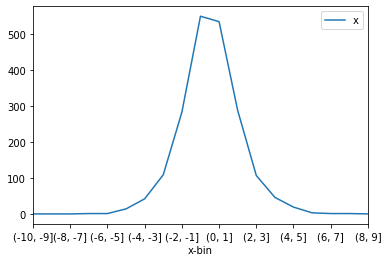

<Figure size 432x288 with 0 Axes>

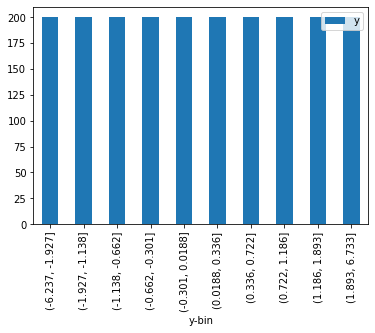

In [8]:
# Can plot out the bucket counts
plt.figure()
bar_data = data_3[['x-bin', 'x']].groupby('x-bin').count().plot()

plt.figure()
bar_data = data_3[['y-bin', 'y']].groupby('y-bin').count().plot(kind='bar')

In [9]:
# It's possible to select a subset of data.
# Let's find all rows with positive x and y values.
# Note that the conditional syntax is slightly different than what you would
# expect to see with plain old Python conditionals.

positive_vals = data_3[(data_3['x'] > 0) & (data_3['y'] > 0)]
print("positive stats:", positive_vals.describe(), sep='\n')

negative_vals = data_3[(data_3['x'] < 0) & (data_3['y'] < 0)]
print("negative stats:", negative_vals.describe(), sep='\n')

positive stats:
                x           y
count  506.000000  506.000000
mean     1.244526    1.197415
std      1.064073    1.059263
min      0.009019    0.001692
25%      0.493853    0.386581
50%      0.931772    0.948186
75%      1.640480    1.694088
max      7.103554    6.663290
negative stats:
                x           y
count  488.000000  488.000000
mean    -1.117589   -1.178090
std      0.944357    1.010490
min     -5.606965   -5.591938
25%     -1.558124   -1.680144
50%     -0.868331   -0.906039
75%     -0.411711   -0.407849
max     -0.002566   -0.004590


<Figure size 432x288 with 0 Axes>

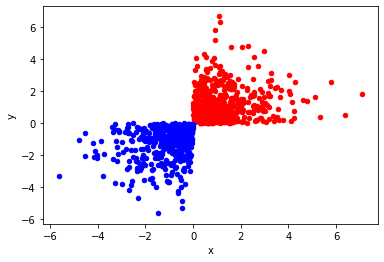

In [10]:
# Can capture the output of a plot call to get the axis object
# for the plot. Can set the ax argument to future plot calls
# in order to display other dataframes on the same plot
plt.figure()
plot_axis = positive_vals.plot.scatter(x='x', y='y', c='red')
negative_vals.plot.scatter(x='x', y='y', c='blue', ax=plot_axis)